In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os
sys.path.append(os.path.abspath('..')) 

In [2]:
# Load datasets
studentRegistration = pd.read_csv('../data/studentRegistration.csv')
studentInfo = pd.read_csv('../data/studentInfo.csv')
studentVle = pd.read_csv('../data/vle.csv')
studentAssessment = pd.read_csv('../data/studentAssessment.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')
assessments = pd.read_csv('../data/assessments.csv')

In [16]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [17]:
studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [18]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

We have 45 NaN value in the date of registration we should handle them. The unregistration date is not that important so we can delete it.

In [20]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [21]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [22]:
from src.data_exploration import summarize_datasets, global_summary

In [23]:
datasets = {
    "studentRegistration": pd.read_csv("../data/studentRegistration.csv"),
    "studentInfo": pd.read_csv("../data/studentInfo.csv"),
    "studentVle": pd.read_csv("../data/studentVle.csv"),
    "studentAssessment": pd.read_csv("../data/studentAssessment.csv"),
    "courses": pd.read_csv("../data/courses.csv"),
    "vle": pd.read_csv("../data/vle.csv"),
    "assessments": pd.read_csv("../data/assessments.csv"),
}

summary_df = summarize_datasets(datasets)




 studentRegistration
----------------------
Shape: 32593 rows × 5 cols
Missing values per column:
date_unregistration    22521
date_registration         45
dtype: int64

 studentInfo
--------------
Shape: 32593 rows × 12 cols
Missing values per column:
imd_band    1111
dtype: int64

 studentVle
-------------
Shape: 10655280 rows × 6 cols
Missing values per column:
Series([], dtype: int64)

 studentAssessment
--------------------
Shape: 173912 rows × 5 cols
Missing values per column:
score    173
dtype: int64

 courses
----------
Shape: 22 rows × 3 cols
Missing values per column:
Series([], dtype: int64)

 vle
------
Shape: 6364 rows × 6 cols
Missing values per column:
week_from    5243
week_to      5243
dtype: int64

 assessments
--------------
Shape: 206 rows × 6 cols
Missing values per column:
date    11
dtype: int64


,Rows,Columns,Total NaN,% NaN
Dataset,,,,
studentRegistration,32593,5,22566,13.85
studentInfo,32593,12,1111,0.28
studentVle,10655280,6,0,0.00
studentAssessment,173912,5,173,0.02
courses,22,3,0,0.00
vle,6364,6,10486,27.46
assessments,206,6,11,0.89


/Users/myriam/Desktop/Data Mining /projet/oulad-network-exploration/src/data_exploration.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


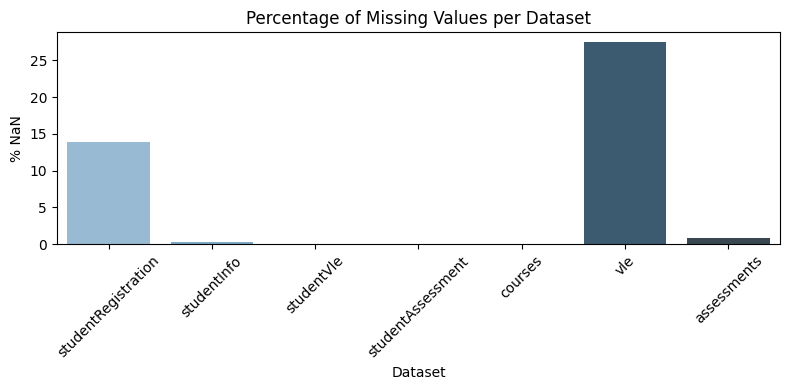

In [24]:
global_summary(summary_df)

According to the graph there is some missing values but before we handle that we will merge the data first

### Merging data 

We are not going to lose any information when merging these too, we will use StudentRegisteration to gain extra information about date of registeration and unregisteration, courses will add the module length for each course

In [26]:
student_data = pd.merge(studentRegistration, studentInfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [27]:
student_data = pd.merge(student_data, courses, on=['code_module', 'code_presentation'], how='inner')

In [28]:
student_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


In [29]:
student_data.isna().sum()

code_module                       0
code_presentation                 0
id_student                        0
date_registration                45
date_unregistration           22521
gender                            0
region                            0
highest_education                 0
imd_band                       1111
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
disability                        0
final_result                      0
module_presentation_length        0
dtype: int64

We will use inner merge to add the assesment details for each id_assessment, we are not going to lose any information

In [30]:
student_assesment_data = assessments.merge(studentAssessment,on=['id_assessment'],how="inner")

In [34]:
# one line : a student + a module + one session
student_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


In [32]:
student_assesment_data.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
weight                  0
id_student              0
date_submitted          0
is_banked               0
score                 173
dtype: int64

In [33]:
student_assesment_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
